In [1]:
import os
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import cv2

In [2]:
rpm = 333.333333333333/2 # rpm
width = 2000 # mm
speed = 5000 # mm/min
BiskRadius = 130
SiskRadius = 1.5

zoom = 10

In [3]:
rps = rpm / 60
rpf = rps / 60
speedps = speed / 60
speedpf = speedps / 60

In [4]:
A = np.arange(0, 4*np.pi, rpf) - np.pi/2
B = np.linspace(0, 4*speedpf, len(A))

A.shape, B.shape

((272,), (272,))

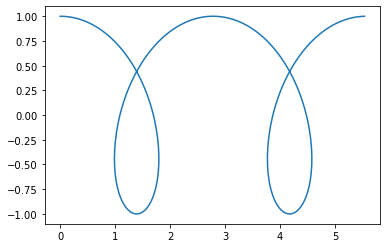

In [5]:
plt.plot(np.cos(A)+B, -np.sin(A))

In [10]:
theta = - np.pi / 2
cx, cy = 150, 250

In [11]:
img = np.zeros(np.array([1000, 2500]) * zoom, np.uint8)

In [12]:
os.makedirs('frames', exist_ok = True)
divs = 600

for i in range(500):
    print('{:04d}'.format(i), end = '\r')
    theta1 = theta + 2*np.pi*rpf
    thetas = np.linspace(theta, theta1, divs+1)
    
    cx1 = cx + speedpf
    cxs = np.linspace(cx, cx1, divs+1)
    
    cy1 = cy
    for j in range(10):
        xs = (BiskRadius * np.cos(thetas + 2*j*np.pi/10) + cxs).reshape((-1, 1))
        ys = (BiskRadius * np.sin(thetas + 2*j*np.pi/10) + cy).reshape((-1, 1))
        pts = np.concatenate((xs, ys), axis = 1)
        img = cv2.polylines(img, np.int32([pts * zoom]), False, 255, int(2 * SiskRadius * zoom))
        
        xs = (BiskRadius * np.cos(thetas + 2*j*np.pi/10) + cxs + 340).reshape((-1, 1))
        ys = (BiskRadius * np.sin(thetas + 2*j*np.pi/10) + cy + 263).reshape((-1, 1))
        pts = np.concatenate((xs, ys), axis = 1)
        img = cv2.polylines(img, np.int32([pts * zoom]), False, 255, int(2 * SiskRadius * zoom))
    cv2.imwrite('frames/{:04d}.png'.format(i), img)
    cx, cy, theta = cx1, cy1, theta1